In [539]:
# import ipython
import matplotlib.pyplot as plt
#import nbgrader
#import notebook
import numpy as np
import pandas as pd
#import sklearn
#import seaborn as sns
import time
#import pyarrow

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix
 
# import category-encoders

In [581]:
test_df = pd.read_csv("data/test.csv")
test_df.set_index("id", inplace=True)


In [541]:
api_data = pd.read_csv('api_data_correct_ids.csv', index_col="ID")
train_df = pd.read_csv('all_data.csv', index_col="id")
train_df = train_df.join(api_data)
train_df = train_df.rename(str.lower, axis='columns')


In [554]:
train_df = train_df.dropna()

In [553]:
train_df.class_label = train_df.class_label.round()

In [582]:
colnames = train_df.columns.drop("class_label")

test_df = test_df.rename(str.lower, axis='columns')
test_df = test_df[colnames]


In [517]:
train_df.shape

(6339, 49)

In [518]:
test_df

,numunderscore,numnumericchars,relativeformaction,ipaddress,atsymbol,tildesymbol,rightclickdisabled,numhash,httpsinhostname,subdomainlevel,...,submitinfotoemail,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt
id,,,,,,,,,,,,,,,,,,,,,
7920,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,-1,0,1,0,0
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6632,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,-1,0,1,0,0
4537,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
8487,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8355,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
4745,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,0,1,0,0


In [519]:
train_df

,numunderscore,numnumericchars,relativeformaction,ipaddress,atsymbol,tildesymbol,rightclickdisabled,numhash,httpsinhostname,subdomainlevel,...,submitinfotoemail,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,0,1,0,0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,-1,0,1,0,0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,1,0,0,0,0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0,0,0,0,-1,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,0,1,1,0,0,0,0
9988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,1,0,0
9991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,1,0,0


In [371]:
train_df.class_label

id
1.0       1
4.0       1
5.0       1
7.0       1
9.0       1
         ..
9873.0    0
9874.0    0
9887.0    0
989.0     1
9893.0    0
Name: class_label, Length: 6309, dtype: int64

In [427]:
np.sum(train_df.class_label==1)

3155

In [578]:
test_df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
id,,,,,,,,,,,,,,,,,,,,,
7920,3,1,2,89,0,1,0,0,0,0,...,0,1,0,0,1,-1,0,1,0,0
912,3,0,4,58,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6632,1,0,5,76,0,0,0,0,0,0,...,0,1,0,0,1,-1,0,1,0,0
4537,6,1,4,72,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8487,1,0,2,36,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2,0,2,31,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8355,2,1,3,43,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4745,4,0,3,81,0,0,0,0,0,0,...,0,0,0,0,1,-1,0,1,0,0


In [573]:
train_df = train_df.drop(non_important_features, axis=1)


KeyError: "[('pctextnullselfredirecthyperlinksrt', 'pctextresourceurls', 'extmetascriptlinkrt', 'numdash', 'pctexthyperlinks', 'pctnullselfredirecthyperlinks', 'httpsinhostname', 'frequentdomainnamemismatch', 'numnumericchars', 'pctextresourceurlsrt', 'doubleslashinpath', 'atsymbol', 'fakelinkinstatusbar', 'numhash', 'popupwindow')] not found in axis"

In [583]:
test_df = test_df.drop(non_important_features, axis=1)


KeyError: "['pctextnullselfredirecthyperlinksrt' 'pctextresourceurls'\n 'extmetascriptlinkrt' 'numdash' 'pctexthyperlinks'\n 'pctnullselfredirecthyperlinks' 'httpsinhostname'\n 'frequentdomainnamemismatch' 'numnumericchars' 'pctextresourceurlsrt'\n 'doubleslashinpath' 'atsymbol' 'fakelinkinstatusbar' 'numhash'\n 'popupwindow'] not found in axis"

In [585]:
test_df

,numunderscore,relativeformaction,ipaddress,tildesymbol,rightclickdisabled,subdomainlevel,pathlevel,randomstring,numdashinhostname,numpercent,...,nohttps,pathlength,extformaction,submitinfotoemail,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,abnormalextformactionr
id,,,,,,,,,,,,,,,,,,,,,
7920,0,0,0,0,0,1,2,1,1,0,...,1,56,0,0,1,0,0,1,-1,1
912,0,0,0,0,0,0,4,1,0,0,...,1,27,0,0,0,0,0,1,0,1
6632,0,1,0,0,0,0,5,1,0,0,...,1,59,0,0,1,0,0,1,-1,1
4537,0,0,0,0,0,1,4,1,0,0,...,1,38,0,0,0,0,0,1,0,1
8487,0,1,0,0,0,0,2,1,0,0,...,1,17,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,0,0,0,0,0,2,0,0,0,...,1,6,0,0,0,0,0,1,1,1
8355,0,0,0,0,0,1,3,0,0,0,...,1,19,0,0,0,0,0,1,1,1
4745,0,1,0,0,0,0,3,0,0,0,...,1,56,0,0,0,0,0,1,-1,1


# Model Training

This assumes we have a variable `df_train_ready` with the training data.
Assumptions:
* Dataframe is sorted by `timestamp` ascending
* The `id` of the trade is the `index`
* We don't have anything other than numerical and categorical columns in the dataset

## Retrieving values for model training

In [586]:
# Getting our df into values
X = train_df.drop(columns=["class_label"]).values
y = train_df.class_label.values

X_test = test_df.values
#test_ids = test_df.id.values

In [587]:
# Using a split of 75-25 - we can try tunning these values later
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

In [588]:
np.sum(y_val==1)

803

## Model Training

### Functions for the Model Training

In [523]:
def perform_grid_search_and_return_best_model(grid_search_input):
    grid_search_input.fit(X_train, y_train)
    print("Best Parameters:")
    display(grid_search_input.best_estimator_.get_params())
    return grid_search_input.best_estimator_

In [524]:
# Plotting the AUC Score
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [525]:
# Getting the AUC and Plotting it against test split for a given model
def auc_against_validation_set(best_model):
    # Get predictions for our test set
    y_val_pred = best_model.predict(X_val)
    
    # AUC Score
    roc_auc = roc_auc_score(y_true=y_val, y_score=y_val_pred)
    
    fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=y_val_pred)
    plot_roc_curve(roc_auc=roc_auc, fpr=fpr, tpr=tpr)
    
    return f1_score(y_true=y_val, y_pred=y_val_pred), np.sum(y_val_pred), len(y_val_pred)

In [526]:
# Get the results for the Test Set and write to the filesystem

def test_set_results(model_input, model_name):
    file_to_save = "predictions_to_submit/{0}_{1}.csv".format(model_name, time.strftime("%Y-%m-%d %H:%M"))
    y_test = model_input.predict(X_test)
    results = pd.DataFrame(data=y_test, index = test_df.index, columns=["CLASS_LABEL"])
    results.index.rename("id", inplace=True)
    results.to_csv(file_to_save)
    return results


In [589]:
# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_rf = {
    'max_depth': [2, 6, 13],
    'n_estimators': [100, 200, 300, 500]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    hyper_parameters_grid_rf,
    cv=3,
    scoring="f1", 
)

best_rf_model = perform_grid_search_and_return_best_model(grid_search_rf)

Best Parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Random Forest Classifier

In [599]:
# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_rf = {
    'max_depth': [2, 6, 13],
    'n_estimators': [100, 200, 300]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    hyper_parameters_grid_rf,
    cv=3,
    scoring="f1", 
)

best_rf_model = perform_grid_search_and_return_best_model(grid_search_rf)

KeyboardInterrupt: 

In [557]:
X_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

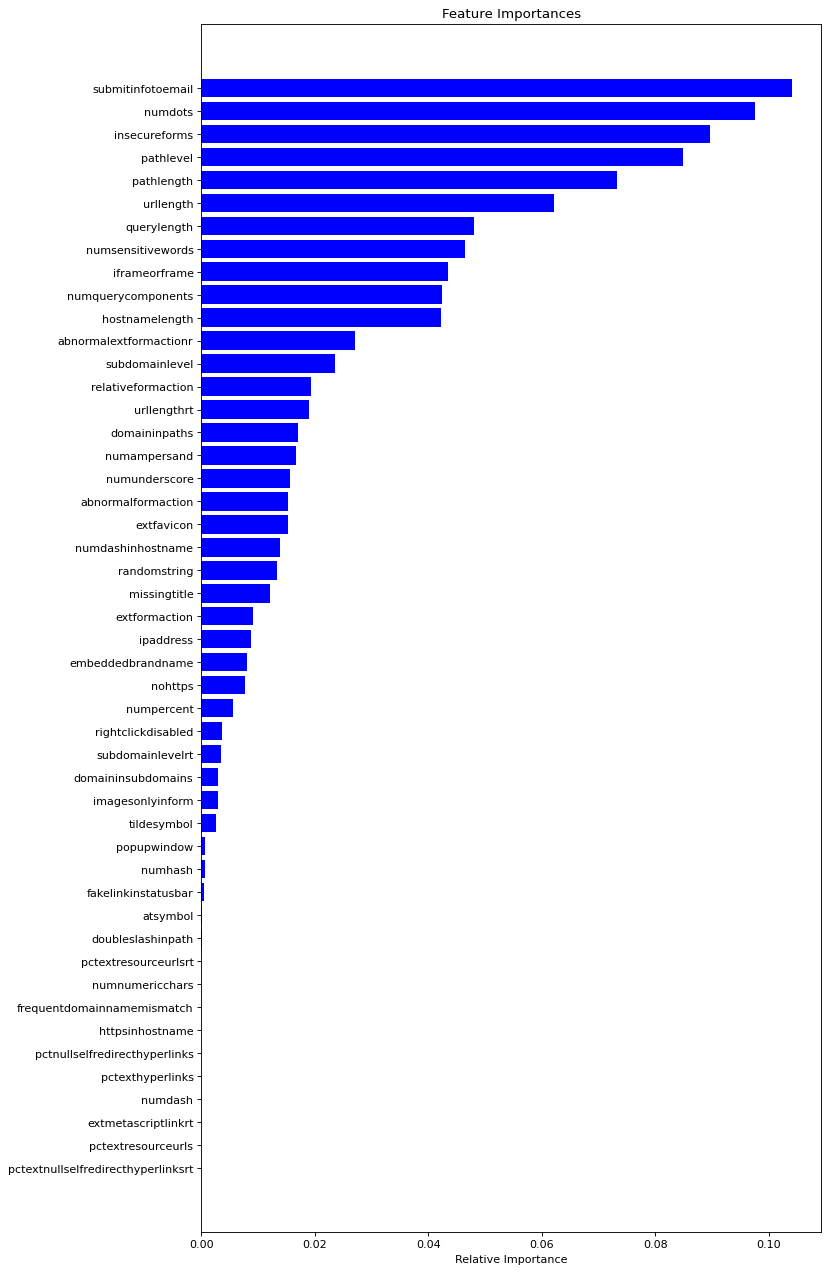

In [565]:
from matplotlib.pyplot import figure

rf = best_rf_model
#rf = pipeline.steps[2][1]
feature_importances = rf.feature_importances_
#features = X_train.columns
features = train_df.drop(columns=["class_label"]).columns

figure(figsize=(10, 20), dpi=80)
indices = np.argsort(feature_importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [570]:
non_important_features = [features[i] for i in indices][0:15]

In [571]:
non_important_features

['pctextnullselfredirecthyperlinksrt',
 'pctextresourceurls',
 'extmetascriptlinkrt',
 'numdash',
 'pctexthyperlinks',
 'pctnullselfredirecthyperlinks',
 'httpsinhostname',
 'frequentdomainnamemismatch',
 'numnumericchars',
 'pctextresourceurlsrt',
 'doubleslashinpath',
 'atsymbol',
 'fakelinkinstatusbar',
 'numhash',
 'popupwindow']

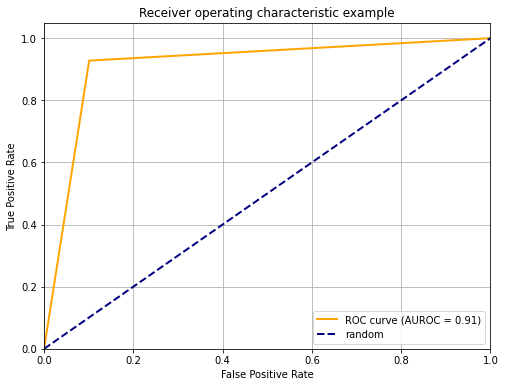

(0.9157959434542102, 824, 1585)

In [596]:
auc_against_validation_set(best_rf_model)


In [597]:
r=test_set_results(best_rf_model, "random_forest")

In [598]:
np.sum(r.CLASS_LABEL==1)

840

In [ ]:
pd.read_csv()

### Gradient Boosting

In [591]:
# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_gb = {
    'max_depth': [1],
    'n_estimators': [500]
}

grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(),
    hyper_parameters_grid_gb,
    cv=3,
    scoring="f1", # already takes into account the metric we are looking for, nice!
)

best_gb_model = perform_grid_search_and_return_best_model(grid_search_gb)

Best Parameters:


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

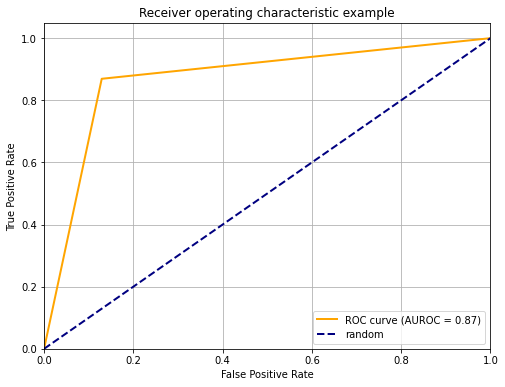

(0.8714107365792759, 799, 1585)

In [592]:
auc_against_validation_set(best_gb_model)

#r = test_set_results(best_gb_model, "gradient_boosting")

In [536]:
np.sum(r.CLASS_LABEL==0)

940

### Logistical Regression

In [600]:
# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_lr = {
    "C": [.1, 1],
    "penalty": ["l1", "l2"]
}

grid_search_lr = GridSearchCV(
    LogisticRegression(),
    hyper_parameters_grid_lr,
    cv=3,
    scoring="f1", # already takes into account the metric we are looking for, nice!
)

best_lr_model = perform_grid_search_and_return_best_model(grid_search_lr)

/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ana

/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [      nan 0.8653231       nan 0.8626692]
  warnings.warn(


Best Parameters:


/home/ana/.virtualenvs/hckt02/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

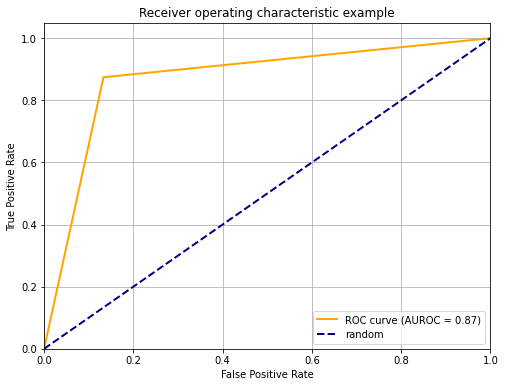

(0.8725916718458671, 806, 1585)

In [594]:
auc_against_validation_set(best_lr_model)

#test_set_results(best_lr_model, "logistical_regression")

### K Nearest

In [457]:
# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_knn = {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform']
}

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    hyper_parameters_grid_knn,
    cv=3,
    scoring="f1", # already takes into account the metric we are looking for, nice!
)

best_knn_model = perform_grid_search_and_return_best_model(grid_search_knn)

Best Parameters:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

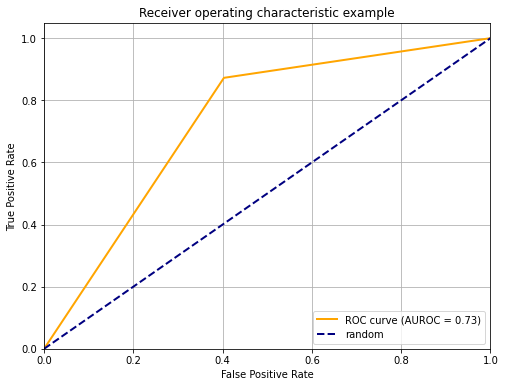

In [458]:
auc_against_validation_set(best_knn_model)

r=test_set_results(best_knn_model, "knn")

In [460]:
np.sum(r.CLASS_LABEL==0)

1673

## SVM

In [461]:
# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_svm = {
    "kernel": ['rbf'],
    "C": [1, 10, 100]
}

grid_search_svm = GridSearchCV(
    SVC(),
    hyper_parameters_grid_svm,
    cv=3,
    scoring="f1", # already takes into account the metric we are looking for, nice!
)

best_svm_model = perform_grid_search_and_return_best_model(grid_search_svm)

Best Parameters:


{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

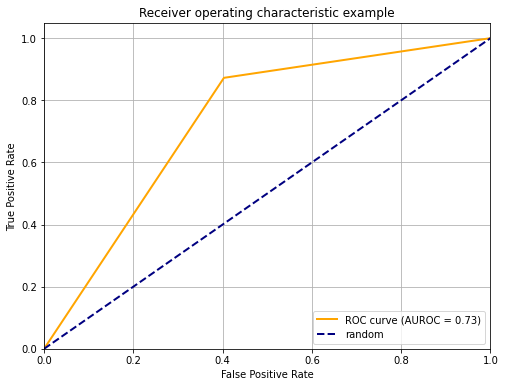

(0.4672364672364673, 771, 1585)

In [462]:
auc_against_validation_set(best_knn_model)

#test_set_results(best_svm_model, "svm")